# n2c2 Shared Task
https://portal.dbmi.hms.harvard.edu/projects/n2c2-t1/

03/15/2018

## Load the All Train Data
There are 202 record files in the folder train/. In the *n2c2-data-preprocessing.ipynb*, all the text and tags have been extracted to a CSV file: all-train.csv

* **DRUG-ABUSE**: Drug abuse, current or past
* **ALCOHOL-ABUS**: Current alcohol use over weekly recommended limits
* **ENGLISH**: Patient must speak English
* **MAKES-DECISIONS**: Patient must make their own medical decisions 
* **ABDOMINAL**: History of intra abdominal surgery, small or large intestine resection or small bowel obstructionn
* **MAJOR-DIABETES**: Major diabetes-related complication
  - For the purposes of this annotation, we define “major complication” (as opposed to "minor complication”) as any of the following that are a result of (or strongly correlated with) uncontrolled diabetes:
   * Amputation
   * Kidney damage
   * Skin conditions
   * Retinopathy
   * nephropathy
   * neuropathy
* **ADVANCED-CAD**: Advanced cardiovascular disease
  - For the purposes of this annotation, we define “advanced” as having two or more of the following:
   * Taking two or more medications to treat CAD
   * History of myocardial infarction
   * Currently experiencing angina
   * Ischemia, past or present
* **MI-6MOS**: Myocardial infarction in the past 6 months
* **KETO-1YR**: Diagnosis of ketoacidosis in the past year
* **DIETSUPP-2MOS**: Taken a dietary supplement (excluding Vitamin D) in the past 2 months
* **ASP-FOR-MI**: Use of aspirin to prevent myocardial infarction
* **HBA1C**: Any HbA1c value between 6.5 and 9.5%
* **REATININE**: Serum creatinine > upper limit of normal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Load the all-train.csv

In [2]:
tags = ['ABDOMINAL', 'ADVANCED-CAD', 'ALCOHOL-ABUSE', 'ASP-FOR-MI', 'CREATININE', \
        'DIETSUPP-2MOS', 'DRUG-ABUSE', 'ENGLISH', 'HBA1C', 'KETO-1YR',\
        'MAJOR-DIABETES', 'MAKES-DECISIONS', 'MI-6MOS']
len(tags)

13

In [3]:
df = pd.read_csv("all-train.csv", index_col=0)

In [4]:
df.head()

,record_file,record_text,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
0,162.xml,Record date: 2068-02-04\n\nASSOCIATED ARTHRITI...,met,met,not met,met,not met,not met,not met,met,not met,not met,not met,met,not met
1,176.xml,Record date: 2085-04-22\n\n \nThis patient wan...,met,not met,met,not met,not met,met,not met,met,not met,not met,not met,met,not met
2,189.xml,Record date: 2090-07-07\n\nWillow Gardens Care...,not met,met,not met,met,met,met,not met,met,met,not met,met,met,not met
3,214.xml,Record date: 2096-07-15\n\n\n\nResults01/31/20...,not met,met,not met,met,not met,met,not met,not met,met,not met,not met,met,met
4,200.xml,Record date: 2170-02-17\n\n \n\nReason for Vis...,met,not met,not met,met,not met,met,not met,met,not met,not met,met,met,not met


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 201
Data columns (total 15 columns):
record_file        202 non-null object
record_text        202 non-null object
ABDOMINAL          202 non-null object
ADVANCED-CAD       202 non-null object
ALCOHOL-ABUSE      202 non-null object
ASP-FOR-MI         202 non-null object
CREATININE         202 non-null object
DIETSUPP-2MOS      202 non-null object
DRUG-ABUSE         202 non-null object
ENGLISH            202 non-null object
HBA1C              202 non-null object
KETO-1YR           202 non-null object
MAJOR-DIABETES     202 non-null object
MAKES-DECISIONS    202 non-null object
MI-6MOS            202 non-null object
dtypes: object(15)
memory usage: 25.2+ KB


## Convert 'met' to 1 and 'not met' to 0 in the Data

In [14]:
met2value = {'met':1, 'not met':0}

In [17]:
for tag in tags:
    df[tag] = df[tag].map(met2value)

In [18]:
df.head()

,record_file,record_text,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
0,162.xml,Record date: 2068-02-04\n\nASSOCIATED ARTHRITI...,1,1,0,1,0,0,0,1,0,0,0,1,0
1,176.xml,Record date: 2085-04-22\n\n \nThis patient wan...,1,0,1,0,0,1,0,1,0,0,0,1,0
2,189.xml,Record date: 2090-07-07\n\nWillow Gardens Care...,0,1,0,1,1,1,0,1,1,0,1,1,0
3,214.xml,Record date: 2096-07-15\n\n\n\nResults01/31/20...,0,1,0,1,0,1,0,0,1,0,0,1,1
4,200.xml,Record date: 2170-02-17\n\n \n\nReason for Vis...,1,0,0,1,0,1,0,1,0,0,1,1,0


## Text Normalization
Normalize the record texts in some ways

In [21]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [47]:
# normalize the text
def normalize_text(text):
    
    text = re.sub(r'\n', " ", text)
    text = re.sub(r"[--][-]+", " ", text)
    text = re.sub(r"[__][_]+", " ", text)
    text = re.sub(r"[\*\*][\*]+", " ", text)
    text = text.lower()
    for char in ['.', '"', ',', '(', ')', '!', '?', ';', ':', '\t']:
        text = text.replace(char, ' ' + char + ' ')
    # text = re.sub(r"[\w]*[\d]+[\d.-]+[\w]*|\d", " NUM ", text)
    text = re.sub(r"[  ][ ]+", " ", text) 
    
    return text

## Create Training Data and Build Doc2Vec Models
Using the gensim package for doc2vec functions

In [38]:
import gensim
from gensim.models import Doc2Vec

In [48]:
# convert a doc and a tag to a gensim TaggedDocument object
def make_taggedDocument(doc, tag_list):
    '''
    INPUT
        doc: a text string
        tags_list: a list of tags
    '''
    toks = gensim.utils.to_unicode(doc).split()
    ans = gensim.models.doc2vec.TaggedDocument(toks, tag_list)
    
    return ans

In [55]:
doc_list = []
for i in range(df.shape[0]):
    tag_list = [df.iloc[i]['record_file']]
    normalized_text = normalize_text(df.iloc[i]['record_text'])
    taggedDoc = make_taggedDocument(normalized_text, tag_list)
    doc_list.append(taggedDoc)

### Build Doc2Vec Models

In [58]:
from collections import OrderedDict
import multiprocessing

In [60]:
cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise"

simple_models = [
    # PV-DM w/ concatenation - window=5 (both sides) \
    # approximates paper's 10-word total window size
    Doc2Vec(dm=1, dm_concat=1, vector_size=400, window=5, negative=5, \
            hs=0, min_count=2, workers=cores),
    # PV-DBOW 
    Doc2Vec(dm=0, vector_size=400, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DM w/ average
    Doc2Vec(dm=1, dm_mean=1, vector_size=400, window=10, negative=5, \
            hs=0, min_count=2, workers=cores),
]

# Speed up setup by sharing results of the 1st model's vocabulary scan
simple_models[0].build_vocab(doc_list)  
# PV-DM w/ concat requires one special NULL word so it serves as template
print(simple_models[0])
for model in simple_models[1:]:
    model.reset_from(simple_models[0])
    print(model)

models_by_name = OrderedDict((str(model), model) for model in simple_models)

Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8)
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8)
Doc2Vec(dm/m,d400,n5,w10,mc2,s0.001,t8)


In [72]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
models_by_name['dbow+dmm'] = ConcatenatedDoc2Vec([simple_models[1], simple_models[2]])
models_by_name['dbow+dmc'] = ConcatenatedDoc2Vec([simple_models[1], simple_models[0]])

### Utilities for Timing

In [61]:
# For timing
from contextlib import contextmanager
from timeit import default_timer
import time 

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start

### Buik Training for Doc2Vec

In [74]:
output_names = [
    'Doc2Vec-dmc',
    'Doc2Vec-dbow',
    'Doc2Vec-dmm',
    'Doc2Vec-dbow-dmm',
    'Doc2Vec-dbow-dmc'
]

def get_saved_file(model_name):
    ans = ''
    if model_name == 'Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8)':
        ans = 'Doc2Vec-dmc'
    elif model_name == 'Doc2Vec(dbow,d400,n5,mc2,s0.001,t8)':
        ans = 'Doc2Vec-dbow'
    elif model_name == 'Doc2Vec(dm/m,d400,n5,w10,mc2,s0.001,t8)':
        ans= 'Doc2Vec-dmm'
    elif model_name == 'dbow+dmm':
        ans = 'Doc2Vec-dbow-dmm'
    elif model_name == 'dbow+dmc':
        ans = 'Doc2Vec-dbow-dmc'
    
    return ans

from random import shuffle
import datetime

alpha, min_alpha, passes = (0.025, 0.001, 20)
alpha_delta = (alpha - min_alpha) / passes

print("START %s" % datetime.datetime.now())

for epoch in range(passes):
    shuffle(doc_list)  # Shuffling gets best results
    
    for name, train_model in models_by_name.items():
        # Train
        duration = 'na'
        train_model.alpha, train_model.min_alpha = alpha, alpha
        with elapsed_timer() as elapsed:
            train_model.train(doc_list, total_examples=len(doc_list), epochs=1)
            duration = '%.1f' % elapsed()
            
        
        best_indicator = '*' 
        print("%s : %i passes : %s %ss" % (best_indicator, epoch + 1, \
                                               name, duration))

        if epoch % 5 == 0:
            model_file = get_saved_file(name) + "_epoch" + str(epoch)
            if name != 'dbow+dmm' and name != 'dbow+dmc':
                train_model.save(model_file)
            
    print('Completed pass %i at alpha %f' % (epoch + 1, alpha))
    alpha -= alpha_delta
    
print("END %s" % str(datetime.datetime.now()))

START 2018-03-18 20:21:50.657522
* : 1 passes : Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8) 3.5s
* : 1 passes : Doc2Vec(dbow,d400,n5,mc2,s0.001,t8) 0.4s
* : 1 passes : Doc2Vec(dm/m,d400,n5,w10,mc2,s0.001,t8) 0.7s
* : 1 passes : dbow+dmm 0.0s
* : 1 passes : dbow+dmc 0.0s
Completed pass 1 at alpha 0.025000
* : 2 passes : Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8) 3.3s
* : 2 passes : Doc2Vec(dbow,d400,n5,mc2,s0.001,t8) 0.4s
* : 2 passes : Doc2Vec(dm/m,d400,n5,w10,mc2,s0.001,t8) 0.7s
* : 2 passes : dbow+dmm 0.0s
* : 2 passes : dbow+dmc 0.0s
Completed pass 2 at alpha 0.023800
* : 3 passes : Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8) 3.2s
* : 3 passes : Doc2Vec(dbow,d400,n5,mc2,s0.001,t8) 0.4s
* : 3 passes : Doc2Vec(dm/m,d400,n5,w10,mc2,s0.001,t8) 0.8s
* : 3 passes : dbow+dmm 0.0s
* : 3 passes : dbow+dmc 0.0s
Completed pass 3 at alpha 0.022600
* : 4 passes : Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8) 3.3s
* : 4 passes : Doc2Vec(dbow,d400,n5,mc2,s0.001,t8) 0.5s
* : 4 passes : Doc2Vec(dm/m,d400,n5,w10,mc2,s0.0

# Build Predictive Models for the Tagging Task

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC

In [83]:
# The trained vectors can be retrieved by tags or index as follows:
#simple_models[0].docvecs['163.xml']
#simple_models[1].docvecs[8]

In [142]:
def get_train_test(df, tag, docvec_size, doc2vec_model):
    '''
    Return the train and test sets for a tag
    INPUT
        df: the DataFrame containing all the data
        tag: a string
        docvec_size: the dimension of the vector size of each document
        doc2vec_model: the doc2vec model used for doc vectors
    OUTPUT
        a tuple of np arrays (X_train, X_test, y_train, y_test)
    '''
    X_file = np.array(df['record_file'])
    y = np.array(df[tag])
    X_train_file, X_test_file, y_train, y_test = \
        train_test_split(X_file, y, test_size = 0.2, random_state = 42)
    X_train = np.zeros([len(X_train_file), docvec_size], dtype = np.float64)
    X_test = np.zeros([len(X_test_file), docvec_size], dtype = np.float64)
    for i in range(len(X_train_file)):
        X_train[i] = doc2vec_model.docvecs[X_train_file[i]]
    for i in range(len(X_test_file)):
        X_test[i] = doc2vec_model.docvecs[X_test_file[i]]
        
    return X_train, X_test, y_train, y_test

In [159]:
def train_logisticRegression(X_train, y_train):
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
    clf = GridSearchCV(LogisticRegression(), param_grid)
    clf.fit(X_train, y_train)
    
    return clf

In [166]:
predict_results = {'model_name':[], 'vector_size':[], 'predict_function':[], \
                  'tag':[], 'score':[]}

def add_predict_results(predict_results, model_name, predict_function, tag, vector_size, \
                       score):
    '''
    Add values to a dictionary containing the methods and results of prediction
    INPUT
        predict_results: the dictionary
        model_name: doc2vec model name
        prediction_function: clasification function
        tag: which tag under prediction
        vector_size: doc2vec vector size
        score: test score
    OUTPUT:
        none
    '''
    
    model_name_list = predict_results['model_name']
    model_name_list.append(model_name)
    
    vector_size_list = predict_results['vector_size']
    vector_size_list.append(vector_size)
    
    predict_function_list = predict_results['predict_function']
    predict_function_list.append(predict_function)
    
    tag_list = predict_results['tag']
    tag_list.append(tag)
    
    score_list = predict_results['score']
    score_list.append(score)

In [165]:
def get_short_model_name(model_name):
    ans = ''
    if model_name == 'Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8)':
        ans = 'dmc'
    elif model_name == 'Doc2Vec(dbow,d400,n5,mc2,s0.001,t8)':
        ans = 'dbow'
    elif model_name == 'Doc2Vec(dm/m,d400,n5,w10,mc2,s0.001,t8)':
        ans= 'dmm'
    elif model_name == 'dbow+dmm':
        ans = 'dbow+dmm'
    elif model_name == 'dbow+dmc':
        ans = 'dbow+dmc'
    
    return ans

In [167]:
# Test logistic regression for all the doc2vec models
useful_tags = ['ABDOMINAL', 'ADVANCED-CAD', 'ALCOHOL-ABUSE', 'ASP-FOR-MI', 'CREATININE', \
        'DIETSUPP-2MOS', 'DRUG-ABUSE', 'ENGLISH', 'HBA1C', \
        'MAJOR-DIABETES', 'MAKES-DECISIONS', 'MI-6MOS']
for name, model in models_by_name.items():
    for tag in useful_tags:
        score = 0.0
        if name == 'dbow+dmm' or name == 'dbow+dmc': 
            X_train, X_test, y_train, y_test = get_train_test(df, tag, 800, model)
            clf = train_logisticRegression(X_train, y_train)
            score = round(clf.score(X_test, y_test)*100, 2)
            add_predict_results(predict_results, get_short_model_name(name), \
                                "LogReg", tag, 800, score)
        else:
            X_train, X_test, y_train, y_test = get_train_test(df, tag, 400, model)
            clf = train_logisticRegression(X_train, y_train)
            score = round(clf.score(X_test, y_test)*100, 2)
            add_predict_results(predict_results, get_short_model_name(name), \
                                "LogReg", tag, 400, score)
            
        print("%s:LogReg:%s:%0.2f " % (name, tag, score))

Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:ABDOMINAL:73.17 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:ADVANCED-CAD:85.37 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:ALCOHOL-ABUSE:97.56 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:ASP-FOR-MI:80.49 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:CREATININE:73.17 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:DIETSUPP-2MOS:56.10 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:DRUG-ABUSE:95.12 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:ENGLISH:90.24 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:HBA1C:70.73 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:MAJOR-DIABETES:60.98 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:MAKES-DECISIONS:97.56 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):LogReg:MI-6MOS:87.80 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):LogReg:ABDOMINAL:73.17 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):LogReg:ADVANCED-CAD:80.49 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):LogReg:ALCOHOL-ABUSE:97.56 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):LogR

In [172]:
results_df = pd.DataFrame(predict_results, columns=['model_name', 'vector_size', \
                                                  'predict_function', 'tag','score'])
results_df.shape

(60, 5)

In [162]:
def train_randomForest(X_train, y_train):
    n_estimators = [200,400]
    min_samples_split = [2]
    min_samples_leaf = [1]
    bootstrap = [True]
    parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, \
                  'min_samples_split': min_samples_split}

    clf = GridSearchCV(RFC(verbose=0,n_jobs=4), cv=10, param_grid=parameters)
    clf.fit(X_train, y_train_abdom)
    
    return clf

In [173]:
for name, model in models_by_name.items():
    for tag in useful_tags:
        score = 0.0
        if name == 'dbow+dmm' or name == 'dbow+dmc': 
            X_train, X_test, y_train, y_test = get_train_test(df, tag, 800, model)
            clf = train_randomForest(X_train, y_train)
            score = round(clf.score(X_test, y_test)*100, 2)
            add_predict_results(predict_results, get_short_model_name(name), \
                                "RandForest", tag, 800, score)
        else:
            X_train, X_test, y_train, y_test = get_train_test(df, tag, 400, model)
            clf = train_randomForest(X_train, y_train)
            score = round(clf.score(X_test, y_test)*100, 2)
            add_predict_results(predict_results, get_short_model_name(name), \
                                "RandForest", tag, 800, score)
            
        print("%s:RandForest:%s:%0.2f " % (name, tag, score))

Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:ABDOMINAL:78.05 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:ADVANCED-CAD:31.71 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:ALCOHOL-ABUSE:85.37 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:ASP-FOR-MI:29.27 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:CREATININE:53.66 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:DIETSUPP-2MOS:65.85 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:DRUG-ABUSE:78.05 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:ENGLISH:34.15 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:HBA1C:51.22 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:MAJOR-DIABETES:53.66 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:MAKES-DECISIONS:21.95 
Doc2Vec(dm/c,d400,n5,w5,mc2,s0.001,t8):RandForest:MI-6MOS:75.61 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):RandForest:ABDOMINAL:70.73 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):RandForest:ADVANCED-CAD:26.83 
Doc2Vec(dbow,d400,n5,mc2,s0.001,t8):RandForest:A

In [174]:
results_df = pd.DataFrame(predict_results, columns=['model_name', 'vector_size', \
                                                  'predict_function', 'tag','score'])
results_df.shape

(120, 5)

In [175]:
results_df.to_csv("predict_results.csv", index=False)

In [176]:
results_df.head()

,model_name,vector_size,predict_function,tag,score
0,dmc,400,LogReg,ABDOMINAL,73.17
1,dmc,400,LogReg,ADVANCED-CAD,85.37
2,dmc,400,LogReg,ALCOHOL-ABUSE,97.56
3,dmc,400,LogReg,ASP-FOR-MI,80.49
4,dmc,400,LogReg,CREATININE,73.17


In [178]:
import seaborn as sns

In [195]:
tags = np.array(results_df['tag'].unique())
tags

array(['ABDOMINAL', 'ADVANCED-CAD', 'ALCOHOL-ABUSE', 'ASP-FOR-MI',
       'CREATININE', 'DIETSUPP-2MOS', 'DRUG-ABUSE', 'ENGLISH', 'HBA1C',
       'MAJOR-DIABETES', 'MAKES-DECISIONS', 'MI-6MOS'], dtype=object)

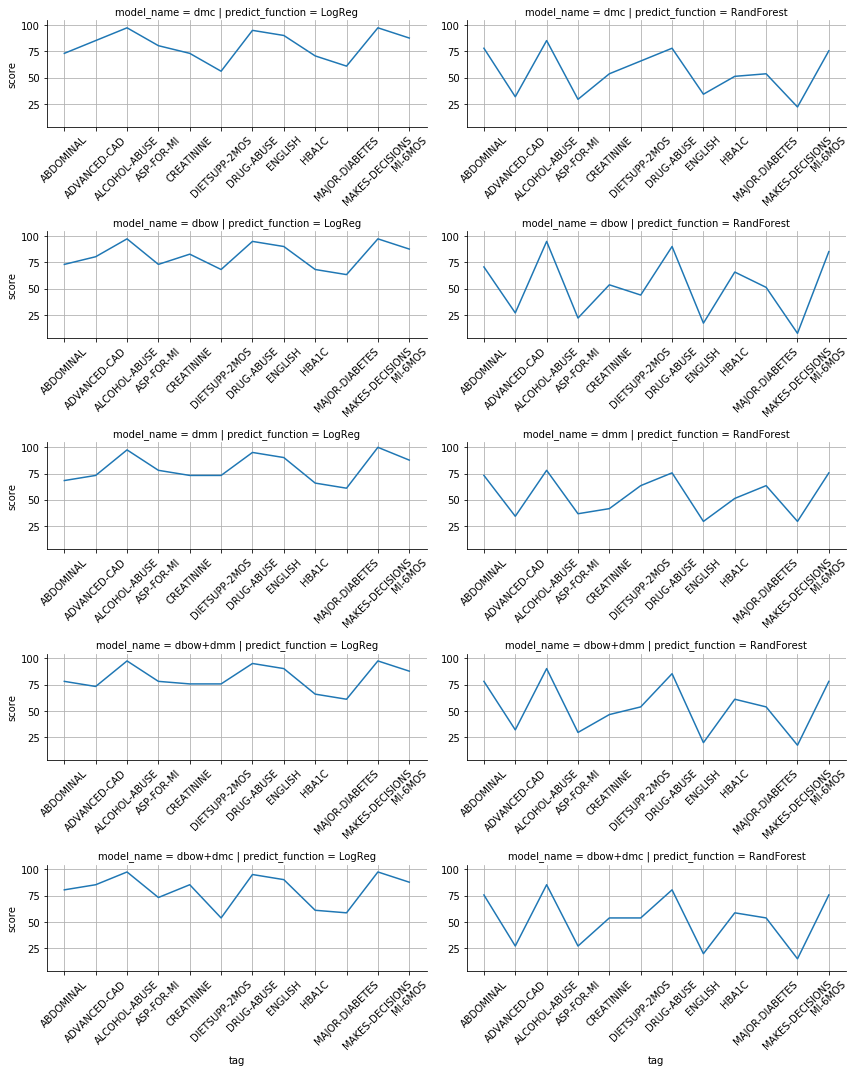

In [202]:
g = sns.FacetGrid(results_df, col='predict_function', row='model_name', size = 3, \
                 aspect = 2)
g.map(plt.plot, 'tag', 'score')
for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.grid()
g.fig.tight_layout()

## Sandbox for Testing Predictive Models

In [119]:
X_file = np.array(df['record_file'])
y_abdom = np.array(df['ABDOMINAL'])

In [120]:
X_train_file, X_test_file, y_train_abdom, y_test_abdom = \
train_test_split(X_file, y_abdom, test_size = 0.2, random_state = 42)
print(len(X_train_file))
print("-" * 10)
print(len(X_test_file))

161
----------
41


In [121]:
X_train = np.zeros([len(X_train_file), 400], dtype = np.float64)
X_test = np.zeros([len(X_test_file), 400], dtype = np.float64)

In [123]:
for i in range(len(X_train_file)):
    X_train[i] = simple_models[1].docvecs[X_train_file[i]]
for i in range(len(X_test_file)):
    X_test[i] = simple_models[1].docvecs[X_test_file[i]]

In [134]:
logre_cls = LogisticRegression()
logre_cls.fit(X_train, y_train_abdom)
logre_cls.score(X_test, y_test_abdom)

0.6829268292682927

In [135]:
# GridSearch for optimizing the Logistic Regression
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(), param_grid)
clf.fit(X_train, y_train_abdom)
clf.score(X_test, y_test_abdom)

0.7317073170731707

In [138]:
from sklearn.ensemble import RandomForestClassifier as RFC
n_estimators = [200,400]
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [True]
parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, \
                  'min_samples_split': min_samples_split}

clf = GridSearchCV(RFC(verbose=1,n_jobs=4), cv=10, param_grid=parameters)
clf.fit(X_train, y_train_abdom)
clf.score(X_test, y_test_abdom)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks    

0.7317073170731707

## Sandbox Area for Testing Text Processing
Test some statements and operations here

In [33]:
text = df['record_text'][0]
text = re.sub(r'\n', " ", text)
text = re.sub(r"[--][-]+", " ", text)
text = re.sub(r"[__][_]+", " ", text)
text = re.sub(r"[\*\*][\*]+", " ", text)
text = text.lower()
for char in ['.', '"', ',', '(', ')', '!', '?', ';', ':', '\t']:
        text = text.replace(char, ' ' + char + ' ')
# text = re.sub(r"[\w]*[\d]+[\d.-]+[\w]*|\d", " NUM ", text)
text = re.sub(r"[  ][ ]+", " ", text)      
text

'record date : 2068-02-04 associated arthritis specialists center quijano , baylee 2-03-68 identification : patient is a 53-year old markedly obese female complaining of bilateral weight knee pain . she denies any morning stiffness , any jelling phenomena . she has had no trauma or effusions in the knee . she had noted on x-ray many years ago that she had had a chipped bone in the right knee and some mild osteoarthritis but it has bothered her only intermittently until this year . last year she did go to briggs stratton and dropped to 270 lb . at which point her knees felt better , but currently she is back up to over 300 lb . and at her height of 5 ft . 1 in . , she is in pain . she has not visited a physician . she has no internist who currently checks on her general medical health , but she does report that the occasional advil she takes does produce some dyspepsia . she has no history of gout , no history of psoriasis , no history of pseudogout or any rash , alopecia , headaches , 

In [44]:
toks = word_tokenize(text)
list(toks)

['record',
 'date',
 ':',
 '2068-02-04',
 'associated',
 'arthritis',
 'specialists',
 'center',
 'quijano',
 ',',
 'baylee',
 '2-03-68',
 'identification',
 ':',
 'patient',
 'is',
 'a',
 '53-year',
 'old',
 'markedly',
 'obese',
 'female',
 'complaining',
 'of',
 'bilateral',
 'weight',
 'knee',
 'pain',
 '.',
 'she',
 'denies',
 'any',
 'morning',
 'stiffness',
 ',',
 'any',
 'jelling',
 'phenomena',
 '.',
 'she',
 'has',
 'had',
 'no',
 'trauma',
 'or',
 'effusions',
 'in',
 'the',
 'knee',
 '.',
 'she',
 'had',
 'noted',
 'on',
 'x-ray',
 'many',
 'years',
 'ago',
 'that',
 'she',
 'had',
 'had',
 'a',
 'chipped',
 'bone',
 'in',
 'the',
 'right',
 'knee',
 'and',
 'some',
 'mild',
 'osteoarthritis',
 'but',
 'it',
 'has',
 'bothered',
 'her',
 'only',
 'intermittently',
 'until',
 'this',
 'year',
 '.',
 'last',
 'year',
 'she',
 'did',
 'go',
 'to',
 'briggs',
 'stratton',
 'and',
 'dropped',
 'to',
 '270',
 'lb',
 '.',
 'at',
 'which',
 'point',
 'her',
 'knees',
 'felt',
 'bet

In [46]:
toks = gensim.utils.to_unicode(text).split()
list(toks)

['record',
 'date',
 ':',
 '2068-02-04',
 'associated',
 'arthritis',
 'specialists',
 'center',
 'quijano',
 ',',
 'baylee',
 '2-03-68',
 'identification',
 ':',
 'patient',
 'is',
 'a',
 '53-year',
 'old',
 'markedly',
 'obese',
 'female',
 'complaining',
 'of',
 'bilateral',
 'weight',
 'knee',
 'pain',
 '.',
 'she',
 'denies',
 'any',
 'morning',
 'stiffness',
 ',',
 'any',
 'jelling',
 'phenomena',
 '.',
 'she',
 'has',
 'had',
 'no',
 'trauma',
 'or',
 'effusions',
 'in',
 'the',
 'knee',
 '.',
 'she',
 'had',
 'noted',
 'on',
 'x-ray',
 'many',
 'years',
 'ago',
 'that',
 'she',
 'had',
 'had',
 'a',
 'chipped',
 'bone',
 'in',
 'the',
 'right',
 'knee',
 'and',
 'some',
 'mild',
 'osteoarthritis',
 'but',
 'it',
 'has',
 'bothered',
 'her',
 'only',
 'intermittently',
 'until',
 'this',
 'year',
 '.',
 'last',
 'year',
 'she',
 'did',
 'go',
 'to',
 'briggs',
 'stratton',
 'and',
 'dropped',
 'to',
 '270',
 'lb',
 '.',
 'at',
 'which',
 'point',
 'her',
 'knees',
 'felt',
 'bet